<a href="https://colab.research.google.com/github/Rajan1735/predicting_compressive_strength/blob/main/predicting_compressive_strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# install required libraries
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow

In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# loading the dataset
data=pd.read_excel("/content/Data UHPC.xls")
data.head()

,C,S,SF,LP,QP,FA,NS,A,W,Fi,SP,T,Age,CS
0,450.0,0.0,50.0,0.0,0.0,0.0,0.0,1992.0,90.0,0.0,18.0,20,28,131.0
1,630.0,0.0,70.0,0.0,0.0,0.0,0.0,1788.0,126.0,0.0,18.0,20,28,135.0
2,810.0,0.0,90.0,0.0,0.0,0.0,0.0,1539.0,162.0,0.0,18.0,20,28,137.0
3,810.0,0.0,90.0,0.0,0.0,0.0,0.0,1539.0,162.0,0.0,18.0,20,28,137.0
4,630.0,180.0,90.0,0.0,0.0,0.0,0.0,1539.0,126.0,0.0,18.0,20,28,150.0


In [4]:
# printing data overview
print('Data overview')
print(data.head())

Data overview
       C      S    SF   LP   QP   FA   NS       A      W   Fi    SP   T  Age  \
0  450.0    0.0  50.0  0.0  0.0  0.0  0.0  1992.0   90.0  0.0  18.0  20   28   
1  630.0    0.0  70.0  0.0  0.0  0.0  0.0  1788.0  126.0  0.0  18.0  20   28   
2  810.0    0.0  90.0  0.0  0.0  0.0  0.0  1539.0  162.0  0.0  18.0  20   28   
3  810.0    0.0  90.0  0.0  0.0  0.0  0.0  1539.0  162.0  0.0  18.0  20   28   
4  630.0  180.0  90.0  0.0  0.0  0.0  0.0  1539.0  126.0  0.0  18.0  20   28   

      CS  
0  131.0  
1  135.0  
2  137.0  
3  137.0  
4  150.0  


In [5]:
# printing missing values
print(data.isnull().sum())

C      0
S      0
SF     0
LP     0
QP     0
FA     0
NS     0
A      0
W      0
Fi     0
SP     0
T      0
Age    0
CS     0
dtype: int64


In [6]:
# describing the dataset
print(data.describe())

                 C           S          SF           LP          QP  \
count   810.000000  810.000000  810.000000   810.000000  810.000000   
mean    737.914642   25.194568  136.987210    41.929506   33.270988   
std     173.457225   74.365464  104.144596   133.131451   79.673876   
min     270.000000    0.000000    0.000000     0.000000    0.000000   
25%     620.200000    0.000000   43.700000     0.000000    0.000000   
50%     770.500000    0.000000  144.000000     0.000000    0.000000   
75%     850.000000    0.000000  219.000000     0.000000    0.000000   
max    1251.200000  375.000000  433.700000  1058.200000  397.000000   

               FA          NS            A           W          Fi  \
count  810.000000  810.000000   810.000000  810.000000  810.000000   
mean    26.264938    3.638642  1150.110000  179.891136   56.044444   
std     67.461703    7.775957   312.152007   25.568235   75.230584   
min      0.000000    0.000000   407.800000   90.000000    0.000000   
25%      0

In [13]:
# preprocess the dataset
# seprate featues x and y
X=data.drop(columns=['CS'])
y=data['CS']

# Splitting the data into training, validation and test data (70,15,15)
X_train, X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.3,random_state=42)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)

# normalise the features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [15]:
# build and train the model
model=Sequential([
    Dense(128,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1)
])

# compile the model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

# train the model
early_stopping=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
history=model.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_val,y_val),
                  callbacks=[early_stopping])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 16720.9121 - mae: 122.8506 - val_loss: 17308.2402 - val_mae: 126.1483
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15947.9346 - mae: 119.7835 - val_loss: 15990.9287 - val_mae: 120.9809
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14228.7402 - mae: 112.4303 - val_loss: 12213.3418 - val_mae: 104.7131
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9624.8613 - mae: 90.7081 - val_loss: 5229.1108 - val_mae: 64.9293
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3499.4048 - mae: 50.8701 - val_loss: 1782.7561 - val_mae: 34.1320
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1668.1576 - mae: 33.2613 - val_loss: 1377.4940 - val_mae: 29.9632
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1184.1365 - mae: 28.0760 - val_loss: 1217.1566 - val_mae: 29.0450
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 962.1688 - mae: 25.5805 - val_loss: 1025.3800 - val_mae: 25.2416


Test mean absolute error: 12.90


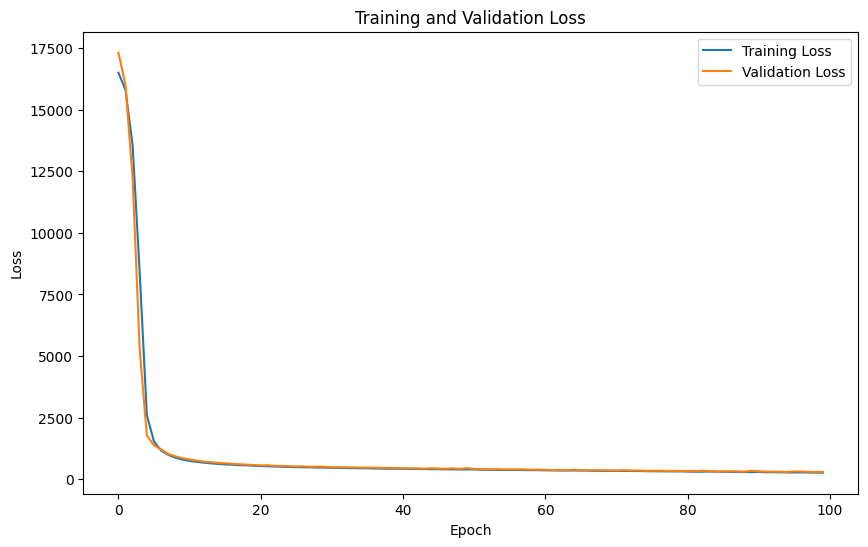

In [16]:
# evaluate the model
loss,mae=model.evaluate(X_test,y_test,verbose=0)
print(f"Test mean absolute error: {mae:.2f}")

# plotting the training history
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


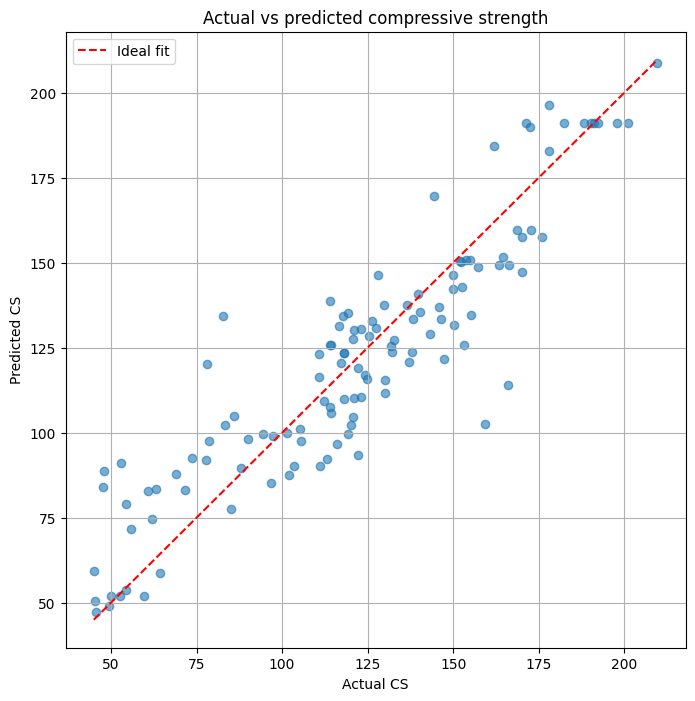

In [18]:
# predictiona and visualisation


# predict on test data
y_pred=model.predict(X_test).flatten()

# plot the acutal vs predicted
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],linestyle='--',color='red',label='Ideal fit')
plt.title('Actual vs predicted compressive strength')
plt.xlabel('Actual CS')
plt.ylabel('Predicted CS')
plt.legend()
plt.grid(True)
plt.show()